## Hi all!
### In this notebook, I am trying to create insights based on this question:
- How Has Indonesia's Biofuel Production Changed Since 2010?
- How Does Indonesia's Biofuel Production Compare to Other Asian countries?
- What is The Predicted Value of The Production in Indonesia by 2029?
### Hope this creates an insight! Thank you.

##### **Import Library & Data**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from termcolor import colored
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('biofuel-production.csv')

##### **Data Understanding**

In [3]:
def title(title_name):
    print(colored(title_name, 'green', attrs=['bold']))

In [4]:
title('The First Five Rows of The Data')
df.head()

The First Five Rows of The Data


,Entity,Code,Year,Biofuels production - TWh
0,Africa (EI),NaN,1990,0.305102
1,Africa (EI),NaN,1991,0.305102
2,Africa (EI),NaN,1992,0.305290
3,Africa (EI),NaN,1993,0.068617
4,Africa (EI),NaN,1994,0.068617


In [5]:
title('The Number of Rows and Columns in The Dataset')
df.shape

The Number of Rows and Columns in The Dataset


(1134, 4)

In [6]:
title('Data Types of Each Features')
df.dtypes

Data Types of Each Features


Entity                        object
Code                          object
Year                           int64
Biofuels production - TWh    float64
dtype: object

In [7]:
title("Cardinality Check")
count_unique = df.nunique(axis=0)
print(count_unique)

Cardinality Check
Entity                        43
Code                          25
Year                          33
Biofuels production - TWh    951
dtype: int64


In [8]:
title('Column Name')
df.columns

Column Name


Index(['Entity', 'Code', 'Year', 'Biofuels production - TWh'], dtype='object')

In [9]:
title('Column Name After Renamed')
df.rename(columns={'Biofuels production - TWh':'Total Biofuels Production in TWh'}, inplace=True)
df.columns

Column Name After Renamed


Index(['Entity', 'Code', 'Year', 'Total Biofuels Production in TWh'], dtype='object')

In [10]:
title('Data Types of Each Features')
df.isna().sum()

Data Types of Each Features


Entity                                0
Code                                522
Year                                  0
Total Biofuels Production in TWh      0
dtype: int64

In [11]:
title('Statistics of Total Biofuels Production')
df['Total Biofuels Production in TWh'].describe()

Statistics of Total Biofuels Production


count    1134.000000
mean       87.256907
std       160.247639
min         0.000000
25%         1.894032
50%        16.540880
75%        93.439810
max      1187.204300
Name: Total Biofuels Production in TWh, dtype: float64

#### **Feature Engineering**

In [12]:
df = df.drop('Code', axis=1)

In [13]:
df.head()

,Entity,Year,Total Biofuels Production in TWh
0,Africa (EI),1990,0.305102
1,Africa (EI),1991,0.305102
2,Africa (EI),1992,0.305290
3,Africa (EI),1993,0.068617
4,Africa (EI),1994,0.068617


In [14]:
title('Number of Occurences for Each Countries')
df['Entity'].value_counts(sort=True)

Number of Occurences for Each Countries


Entity
Africa (EI)                       33
Europe (EI)                       33
Upper-middle-income countries     33
United States                     33
South and Central America (EI)    33
South America                     33
OECD (EI)                         33
North America (EI)                33
North America                     33
Non-OECD (EI)                     33
High-income countries             33
Finland                           33
European Union (27)               33
World                             33
Europe                            33
Austria                           33
Brazil                            33
Germany                           31
France                            31
Spain                             31
Italy                             31
Canada                            25
Argentina                         23
Asia                              23
Asia Pacific (EI)                 23
India                             23
Lower-middle-income countries  

In [15]:
asia_region = ['Thailand', 'Indonesia', 'India', 'China', 'South Korea']

df_asia = df[(df['Year'] >= 2010) & df['Entity'].isin(asia_region)]

In [16]:
title('Dataframe of Asian Countries in The Dataset with Year Above 2009')
df_asia.head(15)

Dataframe of Asian Countries in The Dataset with Year Above 2009


,Entity,Year,Total Biofuels Production in TWh
256,China,2010,17.774601
257,China,2011,22.119545
258,China,2012,23.683100
259,China,2013,26.360820
260,China,2014,29.278551
261,China,2015,24.932436
262,China,2016,23.978706
263,China,2017,19.510063
264,China,2018,27.065264
265,China,2019,33.079388


In [17]:
df_asia.tail(15)

,Entity,Year,Total Biofuels Production in TWh
907,South Korea,2021,6.943901
908,South Korea,2022,7.328577
1001,Thailand,2010,9.699420
1002,Thailand,2011,10.687970
1003,Thailand,2012,14.642171
1004,Thailand,2013,18.712670
1005,Thailand,2014,20.922370
1006,Thailand,2015,22.573830
1007,Thailand,2016,20.259462
1008,Thailand,2017,22.434270


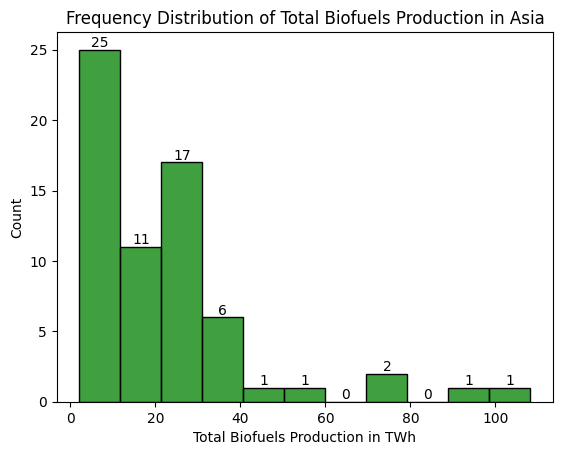

In [18]:
sns.histplot(df_asia['Total Biofuels Production in TWh'], color='green')

for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.title('Frequency Distribution of Total Biofuels Production in Asia')
plt.show()

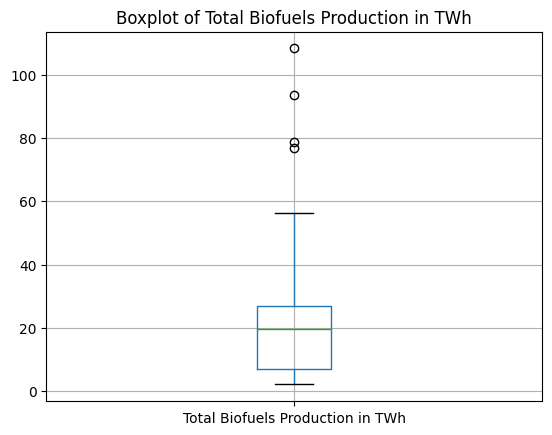

In [19]:
boxplot = df_asia.boxplot(column=['Total Biofuels Production in TWh']) 
plt.title("Boxplot of Total Biofuels Production in TWh")
plt.show()

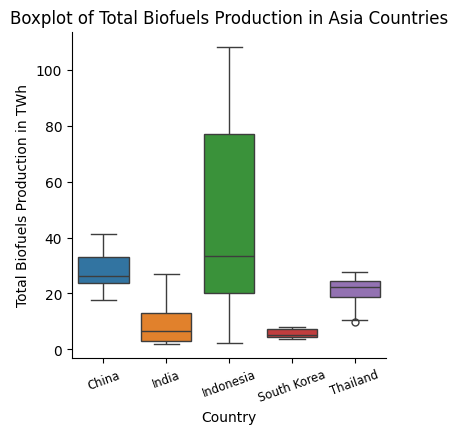

In [20]:
boxplot = sns.catplot(data=df_asia, kind='box', x='Entity', y='Total Biofuels Production in TWh', hue='Entity', sharey=False, height=4)
plt.xticks(
    rotation=20, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='small'  
)
plt.title("Boxplot of Total Biofuels Production in Asia Countries")
plt.xlabel("Country")
plt.show()

#### **1. How Has Indonesia's Biofuel Production Changed Since 2010?**

/var/folders/qp/gs0vrs952ds991c0k_nq4ns80000gn/T/ipykernel_18085/1320747052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Indonesia = df_asia[(df.Entity == "Indonesia")].reset_index(drop=True)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


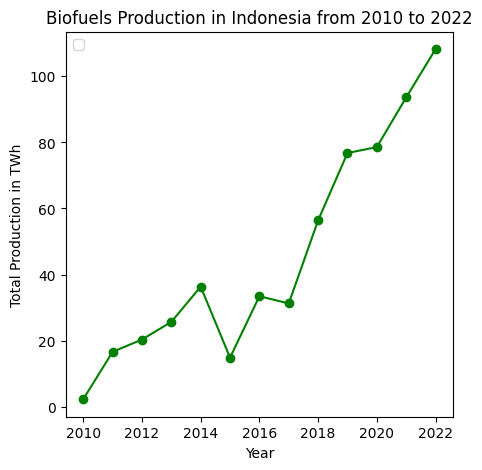

In [21]:
df_Indonesia = df_asia[(df.Entity == "Indonesia")].reset_index(drop=True)
x_Indonesia = df_Indonesia.Year
y_Indonesia = df_Indonesia['Total Biofuels Production in TWh']

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x_Indonesia, y_Indonesia, 'o-', color='green')

ax.set_title('Biofuels Production in Indonesia from 2010 to 2022')
ax.set_xlabel('Year')
ax.set_ylabel('Total Production in TWh')
ax.legend()

In [22]:
df_Indonesia['Percentage Change (%)'] = df_Indonesia['Total Biofuels Production in TWh'].pct_change() * 100
df_Indonesia

,Entity,Year,Total Biofuels Production in TWh,Percentage Change (%)
0,Indonesia,2010,2.239632,NaN
1,Indonesia,2011,16.585947,640.565694
2,Indonesia,2012,20.319769,22.511961
3,Indonesia,2013,25.659634,26.279162
4,Indonesia,2014,36.324234,41.561778
5,Indonesia,2015,14.818550,-59.204783
6,Indonesia,2016,33.429016,125.588981
7,Indonesia,2017,31.234552,-6.564549
8,Indonesia,2018,56.397750,80.562058
9,Indonesia,2019,76.797134,36.170564


In [23]:
df_Indonesia_clean = df_Indonesia.drop(columns='Entity')
title("Indonesia's Biofuels Annual Production")
df_Indonesia_clean

Indonesia's Biofuels Annual Production


,Year,Total Biofuels Production in TWh,Percentage Change (%)
0,2010,2.239632,NaN
1,2011,16.585947,640.565694
2,2012,20.319769,22.511961
3,2013,25.659634,26.279162
4,2014,36.324234,41.561778
5,2015,14.818550,-59.204783
6,2016,33.429016,125.588981
7,2017,31.234552,-6.564549
8,2018,56.397750,80.562058
9,2019,76.797134,36.170564


#### **2. How Does Indonesia's Biofuel Production Compare to Other Asian countries?**

/var/folders/qp/gs0vrs952ds991c0k_nq4ns80000gn/T/ipykernel_18085/3215205030.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Thailand = df_asia[(df.Entity == "Thailand")].reset_index(drop=True)
/var/folders/qp/gs0vrs952ds991c0k_nq4ns80000gn/T/ipykernel_18085/3215205030.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_India = df_asia[(df.Entity == "India")].reset_index(drop=True)
/var/folders/qp/gs0vrs952ds991c0k_nq4ns80000gn/T/ipykernel_18085/3215205030.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_China = df_asia[(df.Entity == "China")].reset_index(drop=True)
/var/folders/qp/gs0vrs952ds991c0k_nq4ns80000gn/T/ipykernel_18085/3215205030.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_SKorea = df_asia[(df.Entity == "South Korea")].reset_index(drop=True)


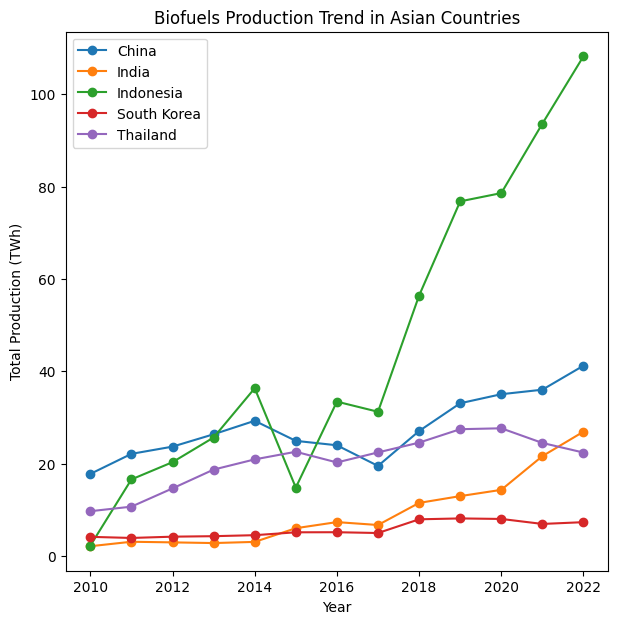

In [24]:
df_Thailand = df_asia[(df.Entity == "Thailand")].reset_index(drop=True)
x_Thailand = df_Thailand.Year
y_Thailand = df_Thailand['Total Biofuels Production in TWh']

df_India = df_asia[(df.Entity == "India")].reset_index(drop=True)
x_India = df_India.Year
y_India = df_India['Total Biofuels Production in TWh']

df_China = df_asia[(df.Entity == "China")].reset_index(drop=True)
x_China = df_China.Year
y_China = df_China['Total Biofuels Production in TWh']

df_SKorea = df_asia[(df.Entity == "South Korea")].reset_index(drop=True)
x_SKorea = df_SKorea.Year
y_SKorea = df_SKorea['Total Biofuels Production in TWh']

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x_China, y_China, 'o-' ,label='China')
ax.plot(x_India, y_India, 'o-' ,label='India')
ax.plot(x_Indonesia, y_Indonesia, 'o-' ,label='Indonesia')
ax.plot(x_SKorea, y_SKorea, 'o-' ,label='South Korea')
ax.plot(x_Thailand, y_Thailand, 'o-' ,label='Thailand')

ax.set_title('Biofuels Production Trend in Asian Countries')
ax.set_xlabel('Year')
ax.set_ylabel('Total Production (TWh)')
ax.legend()

In [25]:
country_only = ["Thailand", "India", "Indonesia", "China", "South Korea"]
extracted_country = df['Entity'].isin(country_only)
extracted_year = df_asia['Year'] == 2022

latest_year = extracted_country & extracted_year

df_latest_year = df[latest_year]

Text(0.5, 1.0, '2022 Biofuels Production in Asian Countries')

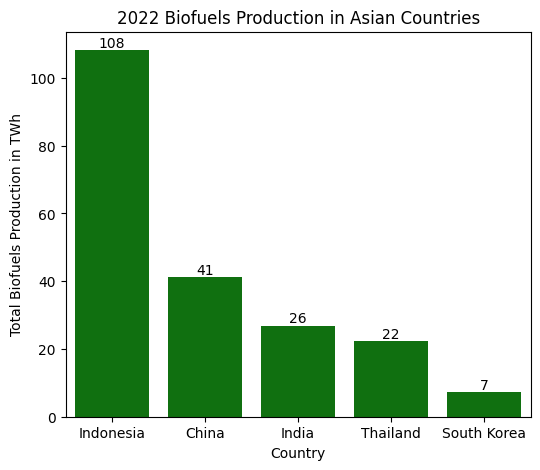

In [26]:
plt.figure(figsize=(6,5))
plot_latest_year = sns.barplot(x=df_latest_year['Entity'], y=df_latest_year['Total Biofuels Production in TWh'], color='green', order= df_latest_year.sort_values('Total Biofuels Production in TWh', ascending=False).Entity)
for p in plt.gca().patches:
    plt.gca().annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.xlabel("Country")
plt.title('2022 Biofuels Production in Asian Countries')

#### **3. What is The Predicted Value of The Production in Indonesia by 2029?**

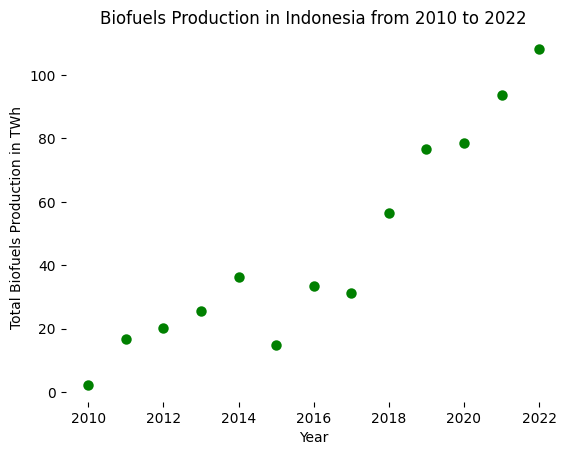

In [27]:
plt.scatter(df_Indonesia['Year'], df_Indonesia['Total Biofuels Production in TWh'], color = 'green', linewidths=1.5)
plt.title('Biofuels Production in Indonesia from 2010 to 2022')
plt.xlabel('Year')
plt.ylabel('Total Biofuels Production in TWh')
plt.box(False)
plt.show()

##### *Data Splitting to Perform Simple Linear Regression*

In [28]:
input = df_Indonesia.iloc[:,1:2]
output = df_Indonesia.iloc[:,2:3]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 0)

In [30]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred_train = linear_model.predict(x_train)
y_pred_test = linear_model.predict(x_test) # prediction

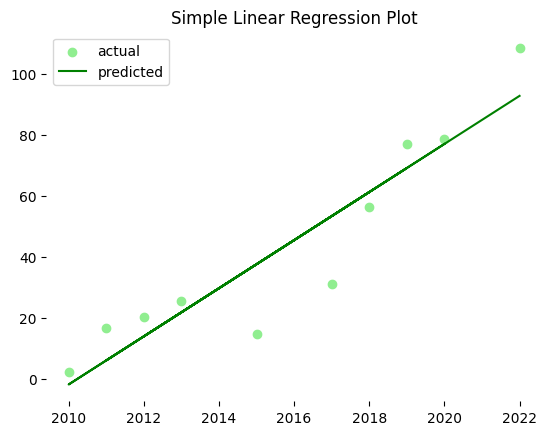

In [32]:
plt.scatter(x_train, y_train, color='lightgreen')
plt.plot(x_train, y_pred_train, color='green')
plt.legend(['actual', 'predicted'], loc='best')
plt.title("Simple Linear Regression Plot")
plt.box(False)
plt.show()

In [33]:
title("Simple Linear Regression Model to Predict Indonesia's Biofuels Production")
print(f'y = {linear_model.intercept_[0]:.2f} + {linear_model.coef_[0][0]:.2f} * x')
print(f"predicted biofuels production = {linear_model.intercept_[0]:.2f} + {linear_model.coef_[0][0]:.2f} * year\n")

Simple Linear Regression Model to Predict Indonesia's Biofuels Production
y = -15832.34 + 7.88 * x
predicted biofuels production = -15832.34 + 7.88 * year



In [34]:
title("Prediction of Indonesia's Biofuels Production in 5 Years")
year = [2023, 2024, 2025, 2026, 2027, 2028, 2029]
for i in year:
    predicted_production = linear_model.intercept_[0] + linear_model.coef_[0][0] * i
    print(f"Predicted Biofuels Production in {i} = {predicted_production:.2f}")

Prediction of Indonesia's Biofuels Production in 5 Years
Predicted Biofuels Production in 2023 = 100.58
Predicted Biofuels Production in 2024 = 108.46
Predicted Biofuels Production in 2025 = 116.33
Predicted Biofuels Production in 2026 = 124.21
Predicted Biofuels Production in 2027 = 132.08
Predicted Biofuels Production in 2028 = 139.96
Predicted Biofuels Production in 2029 = 147.84


In [35]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r_squared = r2_score(y_test, y_pred_test)

title("Evaluation of The Regression Model")
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R Squared: {r_squared:.2f}')

Evaluation of The Regression Model
Mean Squared Error: 88.62
Mean Absolute Error: 9.15
R Squared: 0.88
